# Health care

**By- Annie Gupta**

In [1]:
#import required libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#import required libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel("cep1_dataset .xlsx")

In [3]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Preliminary analysis:

a.	Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.shape

(303, 14)

# Missing Values

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**There are no missing values**

# Duplicate Rows

In [7]:
duplicate_rows=df[df.duplicated()]

In [8]:
print(duplicate_rows)
duplicate_rows.head()

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1  


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


**There is a duplicate row(#164)- we need to drop it**

## Categorical variables

In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [11]:
df.fbs.value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [12]:
df.restecg.value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [13]:
df.exang.value_counts()

0    204
1     99
Name: exang, dtype: int64

In [14]:
df['slope'] = df.slope.replace({0: 'downsloping', 1: 'flat', 2: 'upsloping'})
df.slope.value_counts()

upsloping      142
flat           140
downsloping     21
Name: slope, dtype: int64

In [15]:
df.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [16]:

df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [17]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [18]:
df['target'] = df.target.replace({0: "Disease", 1: "No_disease"})
df.target.value_counts()


No_disease    165
Disease       138
Name: target, dtype: int64

cat_var=['sex','cp','fbs','restecg','exang','slope','ca','thal']
The above features are categorical features - we need to create dummy encoding for these variables later while building the model

## Numerical Variables


In [19]:
all_columns = df.columns.to_list()
all_columns

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

num_var=['age','trestbps','chol','thalach','oldpeak']
The above are numerical variables in our dataframe

# Outliers

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age'>

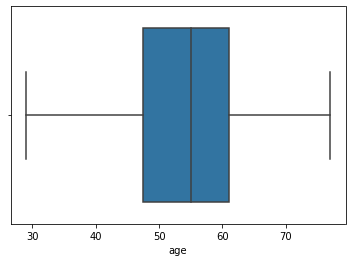

In [20]:
sns.boxplot(df['age'])

**Report**-no outlier in 'age' column

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='trestbps'>

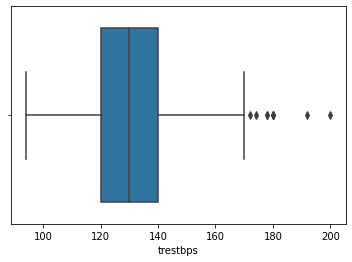

In [21]:
sns.boxplot(df['trestbps'])

**Report**-very few outliers in 'trestbps' column

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='chol'>

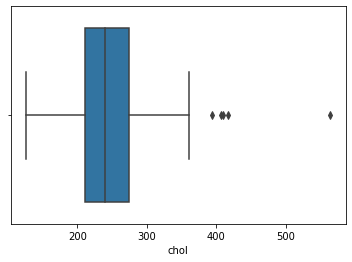

In [22]:
sns.boxplot(df['chol'])

There are few outliers in 'chol' column

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='thalach'>

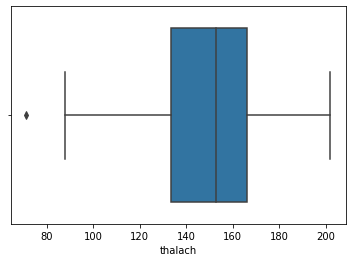

In [23]:
sns.boxplot(df['thalach'])

**Report**-There are outliers in 'thalach' column

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='oldpeak'>

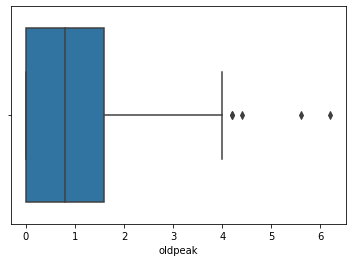

In [24]:
sns.boxplot(df['oldpeak'])

There are outliers in 'oldpeak' column

# Target column Imbalance

In [25]:
df.target.value_counts(normalize=True)

No_disease    0.544554
Disease       0.455446
Name: target, dtype: float64

There is no target column imbalance.

# b.	Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

## Remove Duplicate rows

In [26]:

df=df.drop_duplicates()
df.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,downsloping,0,1,No_disease
1,37,1,2,130,250,0,1,187,0,3.5,downsloping,0,2,No_disease
2,41,0,1,130,204,0,0,172,0,1.4,upsloping,0,2,No_disease
3,56,1,1,120,236,0,1,178,0,0.8,upsloping,0,2,No_disease
4,57,0,0,120,354,0,1,163,1,0.6,upsloping,0,2,No_disease


In [27]:
df.shape


(302, 14)

In [28]:
duplicate_rows=df[df.duplicated()]
print(duplicate_rows)
duplicate_rows.head()

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


Duplicate rows are dropped. There are no duplicates in the dataframe now.

# 2.	Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:

## a.	Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

#### Numerical variables only

**Check the statistical summary for numerical variables**

In [29]:
numerical_data = df[['age','trestbps','chol','thalach','oldpeak']]
numerical_data.head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


**Stats summary**

In [30]:
numerical_data.describe()

,age,trestbps,chol,thalach,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


## Age variable

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age'>

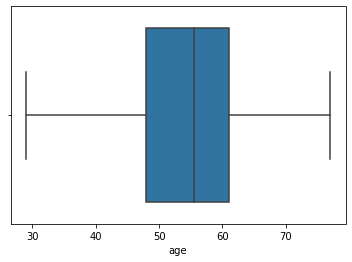

In [31]:
sns.boxplot(df['age'])

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

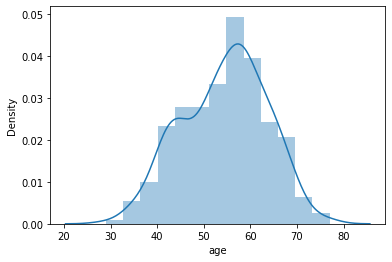

In [32]:
# spread of the data - age of the patient
sns.distplot(df['age'])

**Report-** The age data is quite normally distributed.no prominent skewness

**Mean-** 54.42053

**Median-** 55.50

Since mean and median are almost equal


## trestbps variable

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='trestbps'>

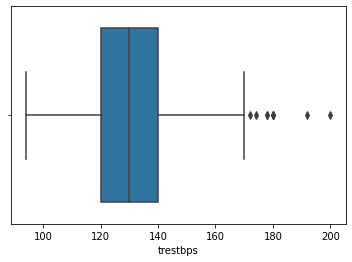

In [33]:
sns.boxplot(df['trestbps'])

**Report**-There are a few outliers in the trestbps columns but not much, we can ignore for the time being

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trestbps', ylabel='Density'>

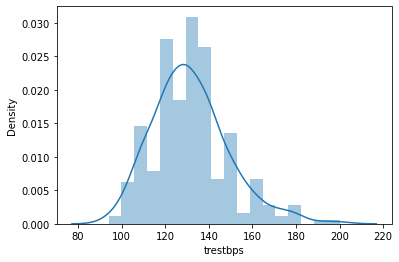

In [34]:
# spread of the data - Resting blood pressure of the patient
sns.distplot(df['trestbps'])

Report- The age data is slightly right skewed

Mean- 131.602649

Median- 130.000000



## Chol Variable

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='chol'>

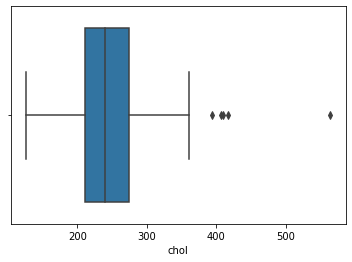

In [35]:
sns.boxplot(df['chol'])

**Report**-There are a few outliers in the trestbps columns but not much, we can ignore for the time being

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chol', ylabel='Density'>

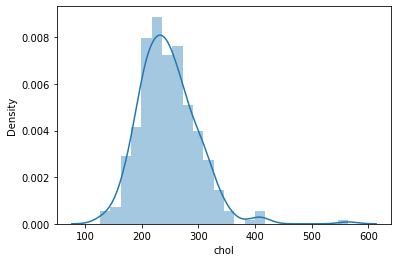

In [36]:
sns.distplot(df['chol'])

**Mean-**  246.500000

**Median-** 240.50000

The data is slight positively skewed, there are few outliers


## thalach

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='thalach'>

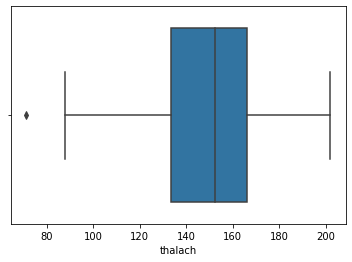

In [37]:
sns.boxplot(df['thalach'])

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='thalach', ylabel='Density'>

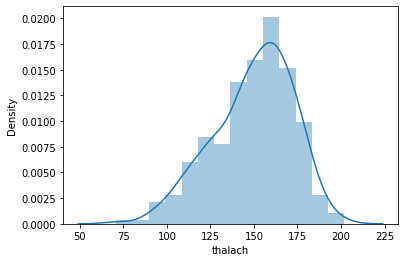

In [38]:
sns.distplot(df['thalach'])

**Mean-**  149.569536

**Median-** 152.500000

The data is slightly left skewed, there are very few outliers

## oldpeak

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='oldpeak'>

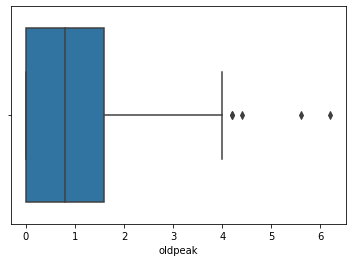

In [39]:
sns.boxplot(df['oldpeak'])

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='oldpeak', ylabel='Density'>

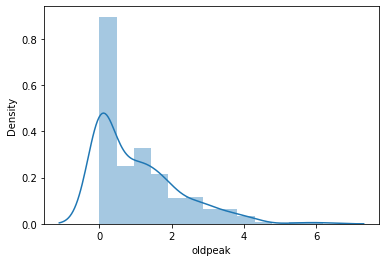

In [40]:
sns.distplot(df['oldpeak'])

**Mean-**  1.043046

**Median-** 0.800000

The data is positively(right) skewed, there are few outliers


# b.Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot

In [41]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,downsloping,0,1,No_disease
1,37,1,2,130,250,0,1,187,0,3.5,downsloping,0,2,No_disease
2,41,0,1,130,204,0,0,172,0,1.4,upsloping,0,2,No_disease
3,56,1,1,120,236,0,1,178,0,0.8,upsloping,0,2,No_disease
4,57,0,0,120,354,0,1,163,1,0.6,upsloping,0,2,No_disease


## Categorical variables

In [42]:
categorical_data = df[['sex','cp','fbs','restecg','exang','slope','ca','thal','target']]
print(categorical_data.shape)
categorical_data.head()

(302, 9)


,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,1,3,1,0,0,downsloping,0,1,No_disease
1,1,2,0,1,0,downsloping,0,2,No_disease
2,0,1,0,0,0,upsloping,0,2,No_disease
3,1,1,0,1,0,upsloping,0,2,No_disease
4,0,0,0,1,1,upsloping,0,2,No_disease


## Sex variable

In [43]:
categorical_data.sex.value_counts(normalize=True)

1    0.682119
0    0.317881
Name: sex, dtype: float64

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


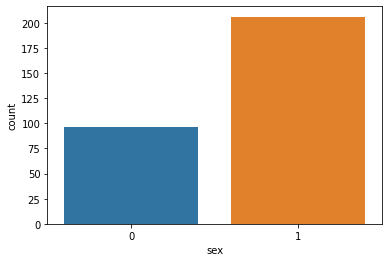

In [44]:
sns.countplot(categorical_data.sex);

**Report-** 68% patients are male

## Cp(Chest pain type)

	-- Value 0: asymptomatic
	-- Value 1: atypical angina
	-- Value 2: non-anginal pain
	-- Value 3: typical angina

In [45]:
categorical_data.cp.value_counts(normalize=True)

0    0.473510
2    0.284768
1    0.165563
3    0.076159
Name: cp, dtype: float64

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='cp', ylabel='count'>

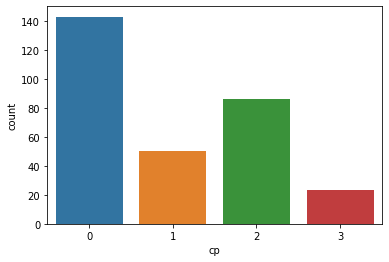

In [46]:
sns.countplot(categorical_data.cp)

**Report**- There are 4 types of chest pain mentioned. Almost 47% patients are asymptomatic for chest pain

## fbs(Fasting blood sugar)
(> 120 mg/dl, 1 = true; 0 = false)

In [47]:
categorical_data.fbs.value_counts(normalize=True)

0    0.850993
1    0.149007
Name: fbs, dtype: float64

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='fbs', ylabel='count'>

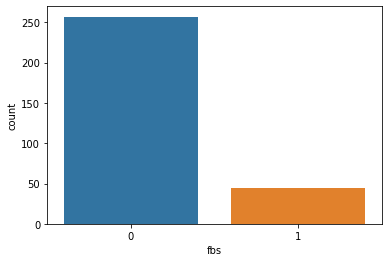

In [48]:
sns.countplot(categorical_data.fbs)

**Report**- Fasting blood sugar level was less than 120 mg/dl for 85% patients

## Restecg
    -- Value 0: showing probable or definite left ventricular hypertrophy by Estes' criteria
	-- Value 1: normal
	-- Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

In [49]:
categorical_data.restecg.value_counts(normalize = True)

1    0.500000
0    0.486755
2    0.013245
Name: restecg, dtype: float64

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


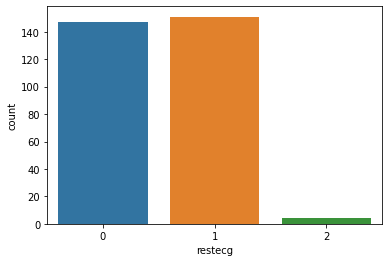

In [50]:
sns.countplot(categorical_data.restecg);

**Report**- Almost 48% patient  were showing probable or definite left ventricular hypertrophy by Estes' criteria and 50% patients had normal  restecg 

## exang
    Exercise induced angina (1 = yes; 0 = no)

In [51]:
categorical_data.exang.value_counts(normalize = True)

0    0.672185
1    0.327815
Name: exang, dtype: float64

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


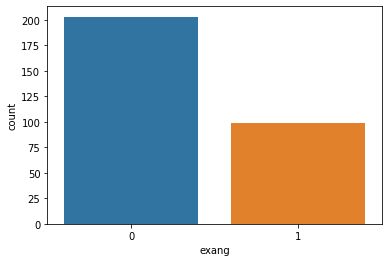

In [52]:
sns.countplot(categorical_data.exang);

**Report**- 67% patient showed no Exercise induced angina pain 

## slope
 the slope of the peak exercise ST segment

In [53]:
categorical_data.slope.value_counts(normalize = True)

upsloping      0.466887
flat           0.463576
downsloping    0.069536
Name: slope, dtype: float64

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='slope', ylabel='count'>

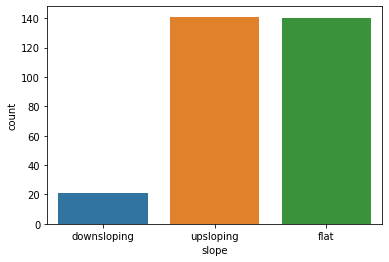

In [54]:
sns.countplot(categorical_data.slope)

**Report**- The slope of the peak exercise ST segment is flat(1) for 46%patient and upsloping(2) for 46% patient

## ca(Coronary artery)
The number of major vessels (0-3)

In [55]:
categorical_data.ca.value_counts(normalize=True)

0    0.579470
1    0.215232
2    0.125828
3    0.066225
4    0.013245
Name: ca, dtype: float64

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ca', ylabel='count'>

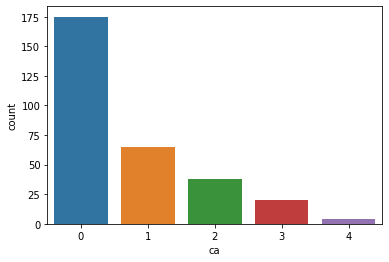

In [56]:
sns.countplot(categorical_data.ca)

**Report**- Almost 57% patients had issues with coronary artery 0

## thal

 
	Value 1: fixed defect (no blood flow in some part of the heart)
	Value 2: normal blood flow
	Value 3: reversible defect (a blood flow is observed but it is not normal)

In [57]:
categorical_data.thal.value_counts(normalize=True)

2    0.546358
3    0.387417
1    0.059603
0    0.006623
Name: thal, dtype: float64

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='thal', ylabel='count'>

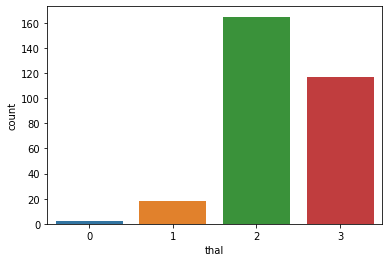

In [58]:
sns.countplot(categorical_data.thal)

**Report**- 54% Patient had normal blood flow and around 38% showed reversible defect (a blood flow is observed but it is not normal)

## target(1 = disease, 0 = no disease)

In [59]:
categorical_data.target.value_counts(normalize=True)

No_disease    0.543046
Disease       0.456954
Name: target, dtype: float64

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='count'>

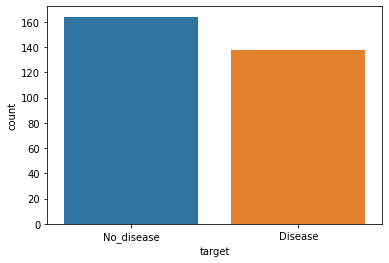

In [60]:
sns.countplot(categorical_data.target)

**Report**- ~45% patient had disease

## c.Study the occurrence of CVD across the Age category

### Bivariate Analysis- Age and CVD (Target) Feature

<AxesSubplot:xlabel='target', ylabel='age'>

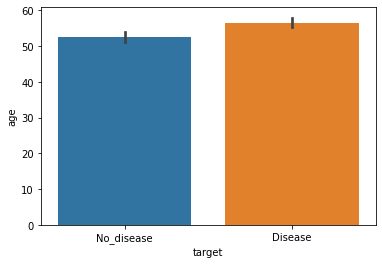

In [61]:
plt.figure(figsize = (6,4))
sns.barplot(x = 'target',y = 'age',data= df)

**Report** - On an avg patient with CVD disease have a higher age (distribution) than people who do not have the disease

## d.	Study the composition of all patients with respect to the Sex category

### Bi-variate Analysis - Gender(1 = male; 0 = female) and CVD (Target) Feature

In [62]:
table=pd.crosstab(df.sex,df.target)

In [63]:
table.head()

target,Disease,No_disease
sex,,
0,24,72
1,114,92


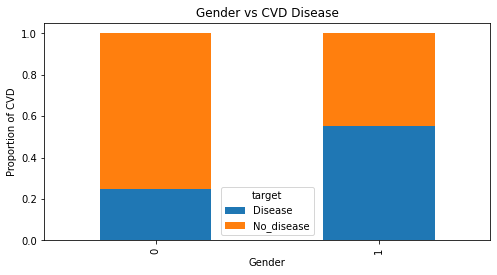

In [64]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(8,4))
plt.title('Gender vs CVD Disease')
plt.xlabel('Gender')
plt.ylabel('Proportion of CVD');

**Report** - Presence of CVD ~20% higher in men than women. CVD is much higher in men.

## e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

**Bivariate Analysis-Target and trestbps**

<AxesSubplot:xlabel='target', ylabel='trestbps'>

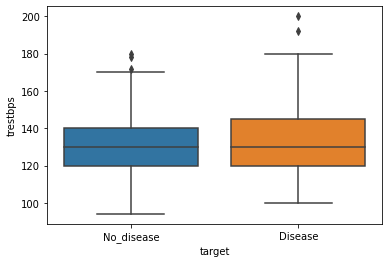

In [65]:
plt.figure(figsize = (6,4))
sns.boxplot(x = 'target',y = 'trestbps',data= df)

**Report** - Very high blood pressure (anomalies) does detect the heart attacks based on the data, though both values of target have anamolies

## f.	Describe the relationship between cholesterol levels and a target variable

### Bivariate Analysis- Target and Chol

<AxesSubplot:xlabel='target', ylabel='chol'>

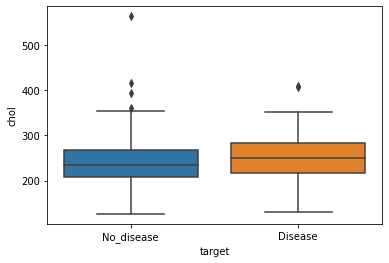

In [66]:
plt.figure(figsize = (6,4))
sns.boxplot(x = 'target',y = 'chol',data= df)

**Report**- On an average, patients with CVD have higher cholesterol level,but some outliers with high cholestrol also found in patients without CVD.

## g.State what relationship exists between peak exercising and the occurrence of a heart attack

### Bivariate Analysis- Target and slope

In [67]:
table=pd.crosstab(df.slope,df.target)
table.head()

target,Disease,No_disease
slope,,
downsloping,12,9
flat,91,49
upsloping,35,106


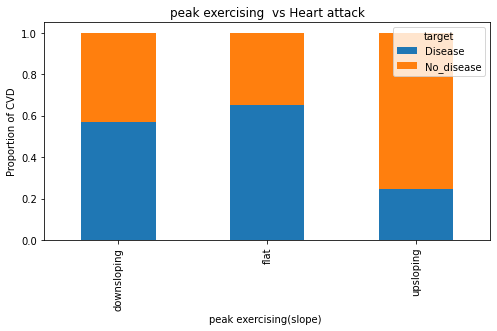

In [68]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(8,4))
plt.title('peak exercising  vs Heart attack')
plt.xlabel('peak exercising(slope) ')
plt.ylabel('Proportion of CVD');

**Report**- In people with CVD the ST segment depression is flat

## h.	Check if thalassemia is a major cause of CVD

**Bivariate Analysis**

In [69]:
table=pd.crosstab(df.thal,df.target)
table.head()

target,Disease,No_disease
thal,,
0,1,1
1,12,6
2,36,129
3,89,28


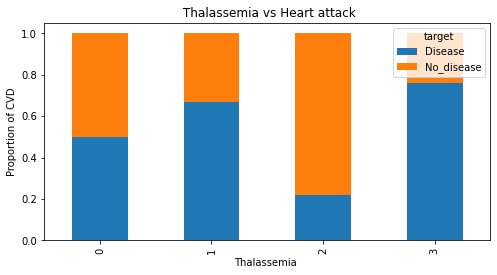

In [70]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(8,4))
plt.title(' Thalassemia vs Heart attack')
plt.xlabel('Thalassemia ')
plt.ylabel('Proportion of CVD');

**Report**- Heart attack is common in thalassemic patients with type 1(fixed defect) and type 3(reversible defect)

Value 1: fixed defect (no blood flow in some part of the heart)

Value 2: normal blood flow

Value 3: reversible defect (a blood flow is observed but it is not normal)

##  i.List how the other factors determine the occurrence of CVD

In [71]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,downsloping,0,1,No_disease
1,37,1,2,130,250,0,1,187,0,3.5,downsloping,0,2,No_disease
2,41,0,1,130,204,0,0,172,0,1.4,upsloping,0,2,No_disease
3,56,1,1,120,236,0,1,178,0,0.8,upsloping,0,2,No_disease
4,57,0,0,120,354,0,1,163,1,0.6,upsloping,0,2,No_disease


## Bivariate Analysis- thalach vs target

<AxesSubplot:xlabel='target', ylabel='thalach'>

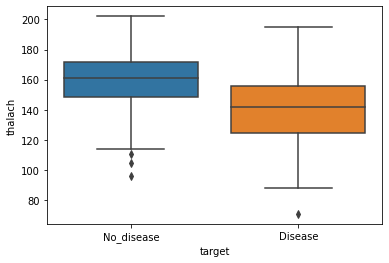

In [72]:
plt.figure(figsize=(6,4))
sns.boxplot(x='target',y='thalach',data=df)

**Report**- Patients with disease achieved lesser heart rate in comparison to patients with no CVD

## Bivariate Analysis- Exercise induced angina (1 = yes; 0 = no) vs Target

In [73]:
table=pd.crosstab(df.exang,df.target)
table.head()

target,Disease,No_disease
exang,,
0,62,141
1,76,23


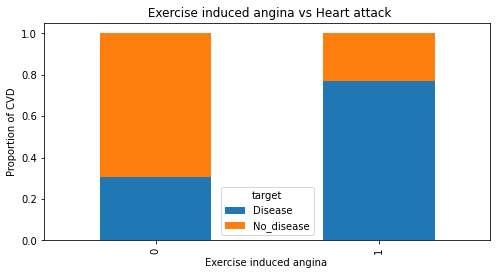

In [74]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(8,4))
plt.title(' Exercise induced angina vs Heart attack')
plt.xlabel('Exercise induced angina ')
plt.ylabel('Proportion of CVD');

**Report**- On average, patients with CVD had excercise induced angina


# j.	Use a pair plot to understand the relationship between all the given variables

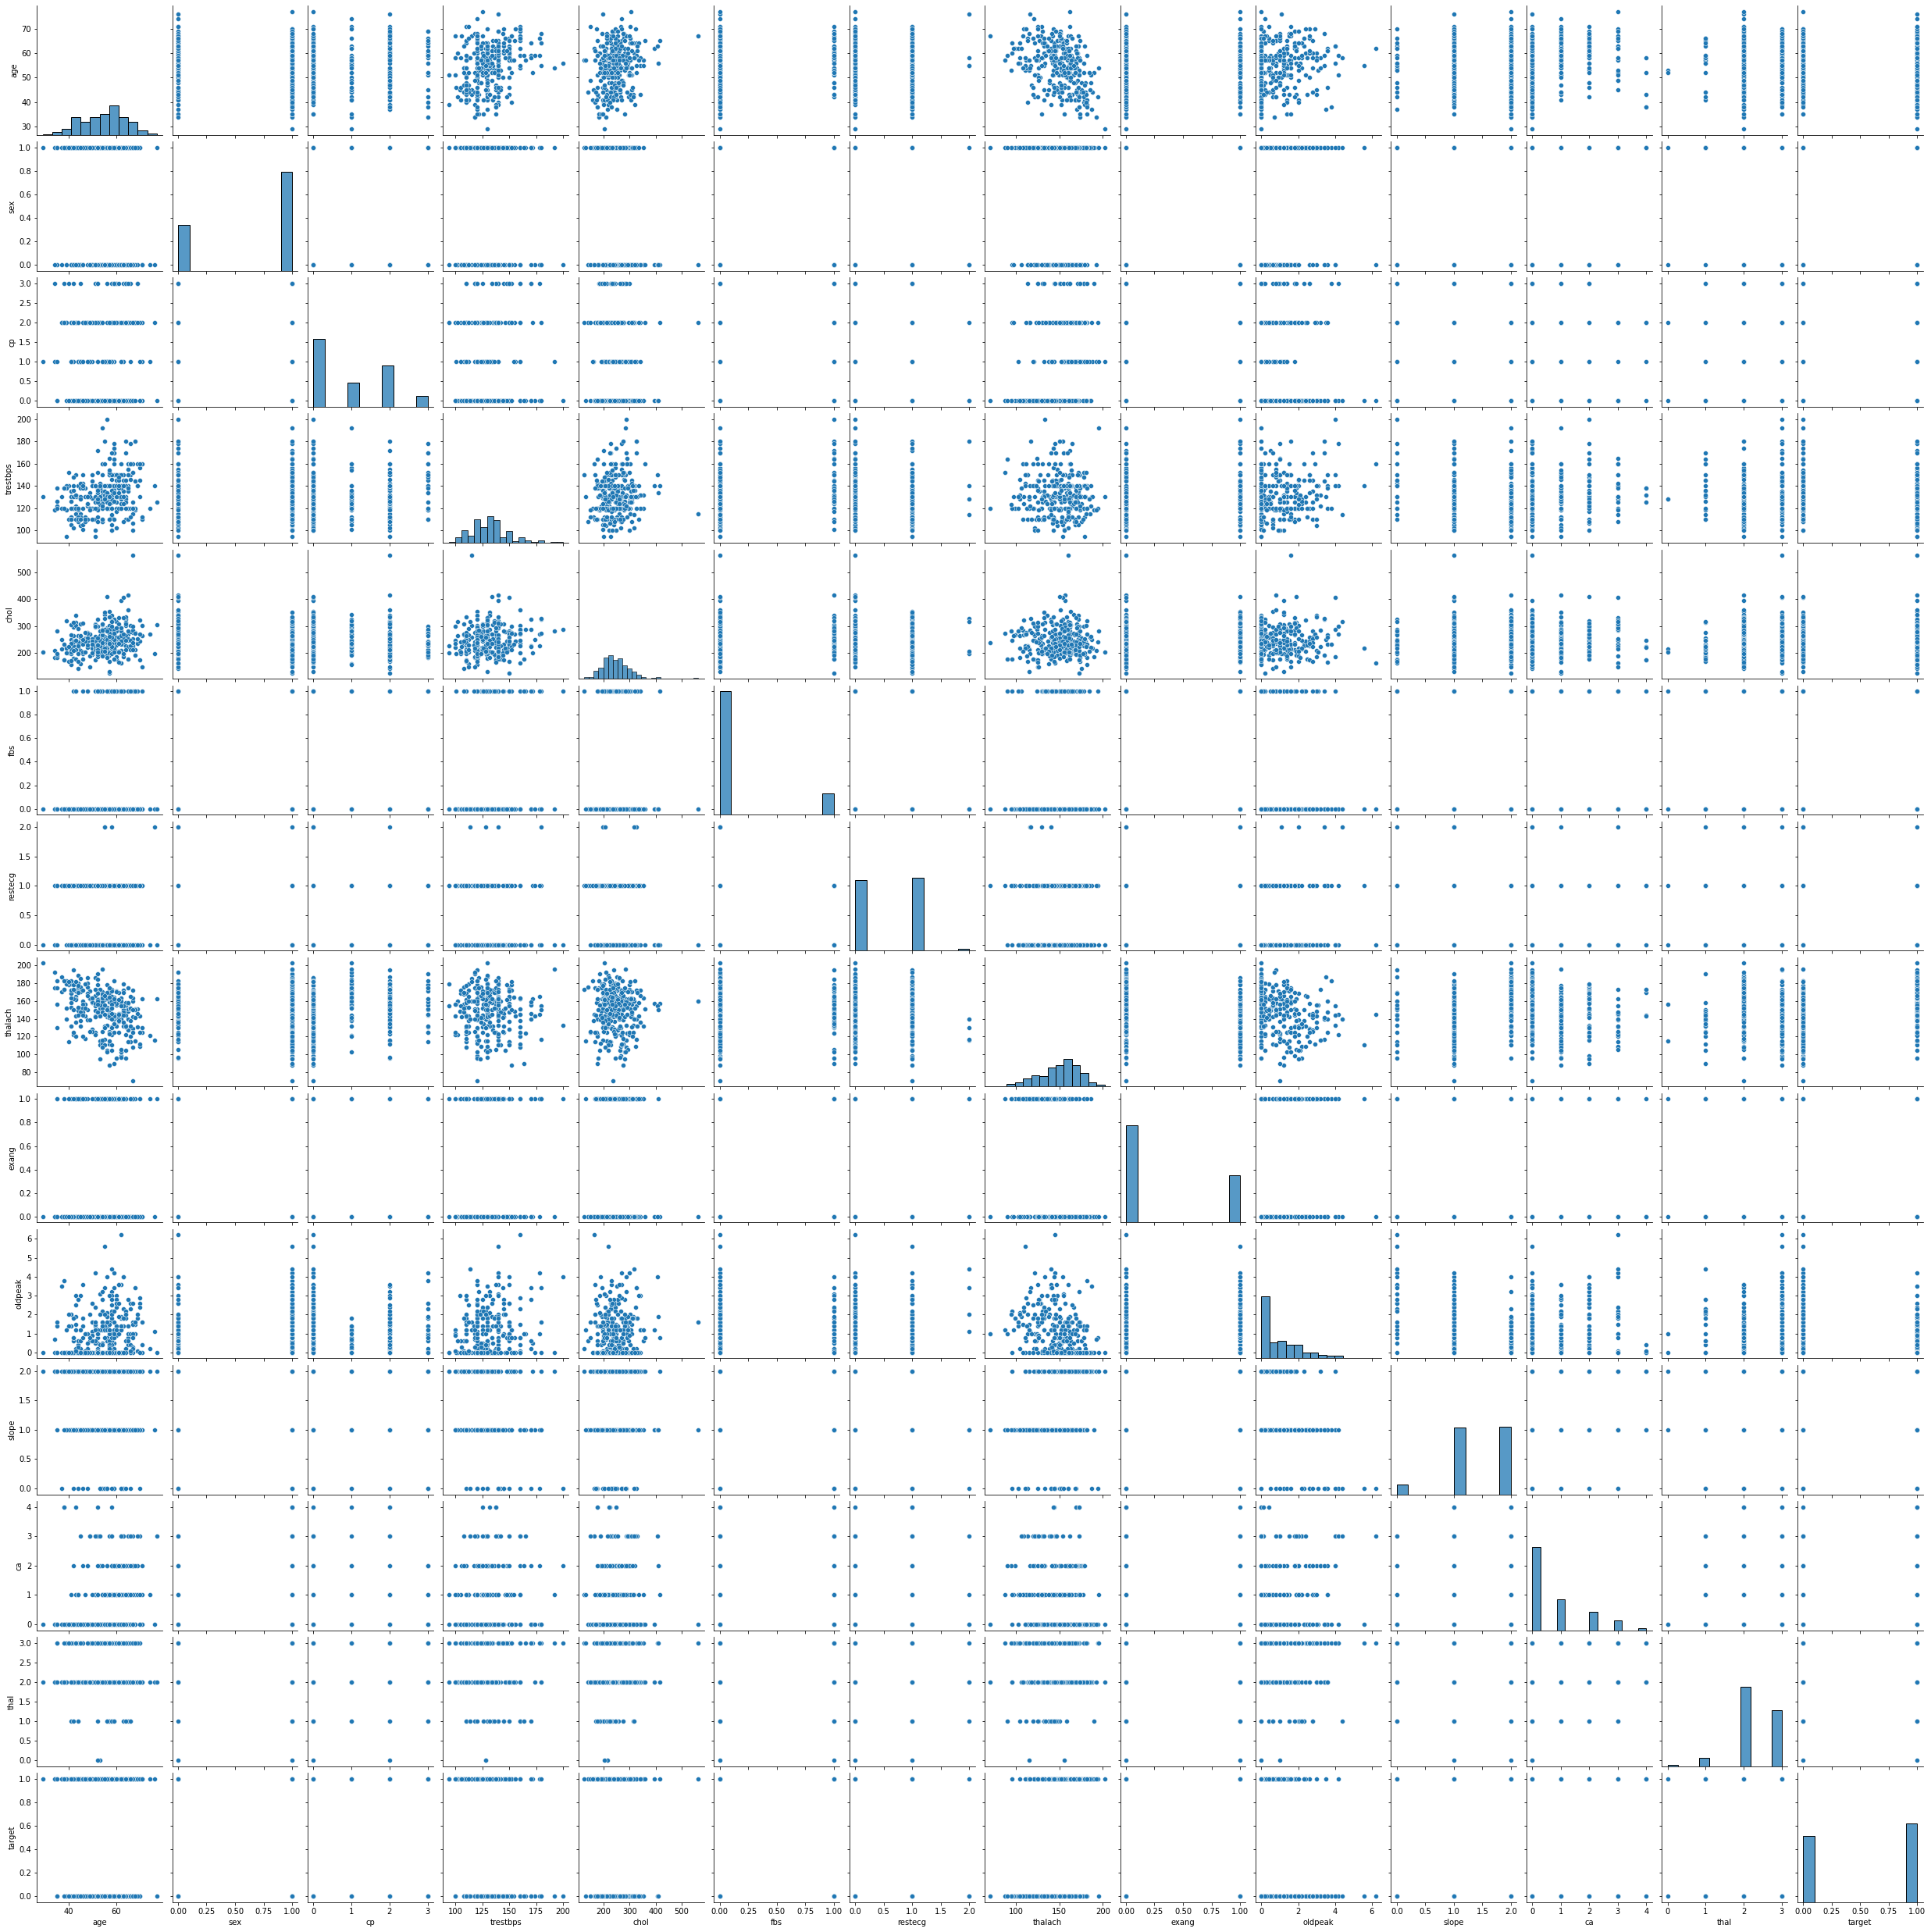

In [77]:
df1=pd.read_excel("cep1_dataset .xlsx")
sns.pairplot(df1)

**Report**-  oldpeak having a linear separation relation between disease and non-disease.
             thalach having a mild separation relation between disease and non-disease.
             Other features don’t form any clear separation

## 3.Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

**Correlation Analysis**

Text(0.5, 1.0, 'Corelation Between Variables')

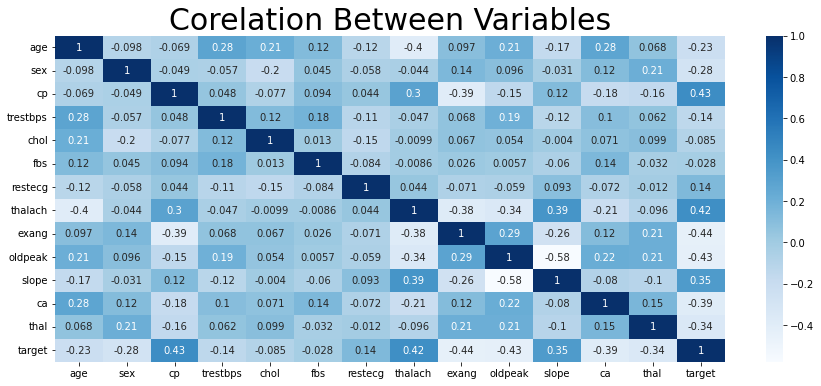

In [79]:
plt.figure(figsize = (15,6))
sns.heatmap(df1.corr(), cmap = 'Blues', annot = True);
plt.title('Corelation Between Variables', fontsize = 30)

**Report**- From this heatmap we can observe that the ‘cp’ chest pain and 'thalach' are highly related to the target variable. Compared to relation between these
two variables we can say that chest pain contributes the most in prediction of presences of a heart disease


# Model base data preparation

In [80]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Dummy Encoding for categorical variables

In [81]:
cat_feats = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

In [82]:
final_data = pd.get_dummies(df1,columns=cat_feats, drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   trestbps   303 non-null    int64  
 2   chol       303 non-null    int64  
 3   thalach    303 non-null    int64  
 4   oldpeak    303 non-null    float64
 5   target     303 non-null    int64  
 6   sex_1      303 non-null    uint8  
 7   cp_1       303 non-null    uint8  
 8   cp_2       303 non-null    uint8  
 9   cp_3       303 non-null    uint8  
 10  fbs_1      303 non-null    uint8  
 11  restecg_1  303 non-null    uint8  
 12  restecg_2  303 non-null    uint8  
 13  exang_1    303 non-null    uint8  
 14  slope_1    303 non-null    uint8  
 15  slope_2    303 non-null    uint8  
 16  ca_1       303 non-null    uint8  
 17  ca_2       303 non-null    uint8  
 18  ca_3       303 non-null    uint8  
 19  ca_4       303 non-null    uint8  
 20  thal_1    

In [83]:
final_data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


## Separate the X & Y variables

In [84]:
X = final_data.drop('target',axis=1)
y = final_data['target']

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=10) 
                                                    
                                                

In [87]:
print("training data shape", X_train.shape)
print("test data shape", X_test.shape)
print("training target shape", y_train.shape)
print("test target shape", y_test.shape)

training data shape (212, 22)
test data shape (91, 22)
training target shape (212,)
test target shape (91,)


In [88]:
#Importing Logistic Regression model
from sklearn.linear_model import LogisticRegression

In [89]:
lr= LogisticRegression(fit_intercept = False, 
                       penalty='none', 
                       solver='newton-cg')

In [90]:
lr_fit = lr.fit(X_train,y_train)

In [91]:
#Fit the model in train and test data
lr_fit.score(X_train,y_train)

0.8962264150943396

## Evalution on the train data

In [92]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, plot_confusion_matrix

In [93]:
y_pred_train = lr_fit.predict(X_train)

In [94]:
accuracy_train = accuracy_score(y_train, y_pred_train) 
print("Accuracy score:",accuracy_train)

Accuracy score: 0.8962264150943396


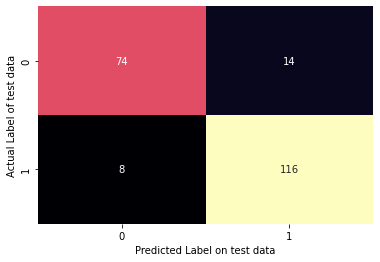

In [95]:
# Let us check how well our model is predicting 1's and 0's 
#plot_confusion_matrix(log_sklearn,X,y)
sns.heatmap(confusion_matrix(y_train,y_pred_train),
            annot=True,
            fmt='d',
            cbar=False,
            cmap='magma')

plt.xlabel("Predicted Label on test data")
plt.ylabel("Actual Label of test data");

In [96]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        88
           1       0.89      0.94      0.91       124

    accuracy                           0.90       212
   macro avg       0.90      0.89      0.89       212
weighted avg       0.90      0.90      0.90       212



**Report**-No overfitting in the model

In [97]:
print(lr_fit.coef_, lr_fit.intercept_)

[[ 0.02510069 -0.03023961 -0.00811778  0.02541352 -0.14464422 -2.21561822
   1.28225101  1.96600789  2.47138253  0.71938674  0.0685695  -0.53107966
  -0.88817869 -0.48000109  1.67531798 -2.82103415 -3.13572089 -3.44979772
   0.83300778  2.71357718  3.09456985  2.18997867]] [0.]


In [98]:
pd.DataFrame(zip(X_train.columns, np.transpose(lr_fit.coef_)), columns=['features', 'coef']) 

,features,coef
0,age,[0.02510068586967943]
1,trestbps,[-0.0302396096818317]
2,chol,[-0.00811777979739744]
3,thalach,[0.02541351820518283]
4,oldpeak,[-0.14464422457760479]
5,sex_1,[-2.215618217631642]
6,cp_1,[1.2822510097712951]
7,cp_2,[1.9660078898329105]
8,cp_3,[2.4713825280948996]
9,fbs_1,[0.719386740459239]


# Stats Model

In [99]:
X_train.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
49,53,138,234,160,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
171,48,110,229,168,1.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
223,56,200,288,133,4.0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
58,34,118,182,174,0.0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
154,39,138,220,152,0.0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [102]:
import statsmodels.api as sm
X_train_constant = sm.add_constant(X_train)

logit_model=sm.Logit(y_train,
                     X_train)

result=logit_model.fit(method= 'newton')

Optimization terminated successfully.
         Current function value: 0.274910
         Iterations 8


In [103]:
print(result.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.595     
Dependent Variable: target           AIC:              160.5620  
Date:               2023-02-16 15:35 BIC:              234.4068  
No. Observations:   212              Log-Likelihood:   -58.281   
Df Model:           21               LL-Null:          -143.88   
Df Residuals:       190              LLR p-value:      1.5170e-25
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
age            0.0251    0.0281   0.8925  0.3722  -0.0300   0.0802
trestbps      -0.0302    0.0138  -2.1903  0.0285  -0.0573  -0.0032
chol          -0.0081    0.0052  -1.5617  0.1184  -0.0183   0.0021
thalach        0.0254    0.013

In [104]:
result.params

age          0.025101
trestbps    -0.030240
chol        -0.008118
thalach      0.025414
oldpeak     -0.144644
sex_1       -2.215625
cp_1         1.282249
cp_2         1.966007
cp_3         2.471386
fbs_1        0.719386
restecg_1    0.068568
restecg_2   -0.531043
exang_1     -0.888179
slope_1     -0.480001
slope_2      1.675321
ca_1        -2.821032
ca_2        -3.135720
ca_3        -3.449798
ca_4         0.833036
thal_1       2.713603
thal_2       3.094588
thal_3       2.189998
dtype: float64

**Report** - Each variable's relationship with target variable using p-value output of logistic Regression and compare that with corrleation output

**Age & CVD** > 0.23 less correlated (but positive relationship between age and heartattack (higher the age, more number of heartattacks).


**chol & CVD** - p-value 11%  correlation - 0.085 (very less correlation)